<a href="https://colab.research.google.com/github/sunnypatel3/hello-workd/blob/main/Spreetail%20Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@author: sunnypatel
import pandas as pd
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_plotly, plot_components_plotly
from scipy.stats import boxcox
import chart_studio.plotly as ply
import cufflinks as cf


In [ ]:
df = pd.read_csv('C:/Users/Sunny Patel/Documents/Weekly Calls Prophet.csv', parse_dates=True)
#df['order_date'] = pd.to_datetime(df['order_date'].astype('str'),'%Y-%m-%d')
holidays = pd.read_csv('C:/Users/Sunny Patel/Documents/test/Holidayswk2.csv')
df = df.rename(columns = {'Attribute': 'cro'})
list_cro = df.cro.unique()
                                 

In [ ]:
print('Data Types: \n')
print(df.dtypes)
print('\n Stat Summary: \n')
print(df.describe())
print('\n Dataset size: \n')
print(df.shape)
print('\n Dataset basic info: \n')
print(df.info())
print('\n Dataset first 5 rows: \n')
print(df.tail(5))
print('\n Null counts: \n')
print(df.isnull().sum())

Data Types: 

ds     object
cro    object
y       int64
dtype: object

 Stat Summary: 

                  y
count    133.000000
mean    3961.285714
std     2049.241983
min      761.000000
25%     2514.000000
50%     3215.000000
75%     5012.000000
max    10499.000000

 Dataset size: 

(133, 3)

 Dataset basic info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      133 non-null    object
 1   cro     133 non-null    object
 2   y       133 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ KB
None

 Dataset first 5 rows: 

             ds    cro     y
128  2021-04-12  Calls  4577
129  2021-04-19  Calls  3962
130  2021-04-26  Calls  2870
131  2021-05-03  Calls  3021
132  2021-05-10  Calls  4255

 Null counts: 

ds     0
cro    0
y      0
dtype: int64


<AxesSubplot:title={'center':'y'}, xlabel='cro'>

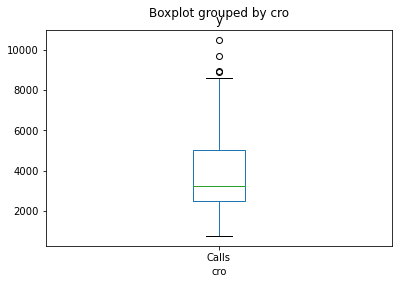

In [ ]:
import seaborn as sns
df.boxplot(by = 'cro', column = 'y', grid = False)

In [ ]:
from scipy import stats
import numpy as np
for cro in list_cro:
    cro_df = df.loc[df['cro'] == cro]
    z= np.abs(stats.zscore(cro_df['y']))
z1 = z[(z<3)]
print(z1)

[1.56759678e+00 9.72942846e-01 9.31797105e-01 2.68077103e-01
 2.43529610e+00 1.07062900e+00 5.57006980e-02 3.22938092e-01
 5.42871879e-01 6.73656558e-01 3.65553325e-01 3.61144853e-01
 5.72261694e-01 6.43287082e-01 6.15366757e-01 6.21244720e-01
 8.30402241e-01 8.47546300e-01 9.43063200e-01 9.32776765e-01
 7.63785326e-01 8.20115805e-01 6.05080322e-01 7.08924337e-01
 8.65670020e-01 5.68343052e-01 6.14876927e-01 2.23012719e-01
 2.99916070e-01 4.70377000e-01 7.16761621e-01 4.40007524e-01
 5.15931214e-01 4.75275303e-01 4.65968528e-01 9.02897119e-01
 6.33000646e-01 6.17326078e-01 6.34959967e-01 7.76031082e-01
 7.20680263e-01 5.95773547e-01 4.71356661e-01 4.92909192e-01
 2.13216114e-01 2.79343199e-01 6.34959967e-01 3.43021133e-01
 1.05033603e+00 1.39174772e+00 1.00086317e+00 1.04494789e+00
 1.22618509e+00 1.11254447e+00 1.22177662e+00 9.70983525e-01
 3.92493989e-01 6.76805467e-01 5.14671651e-01 1.18888801e-01
 8.88692042e-01 5.15441384e-01 3.56876332e-03 1.59824616e-01
 6.24673532e-01 9.445326

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1
Calls


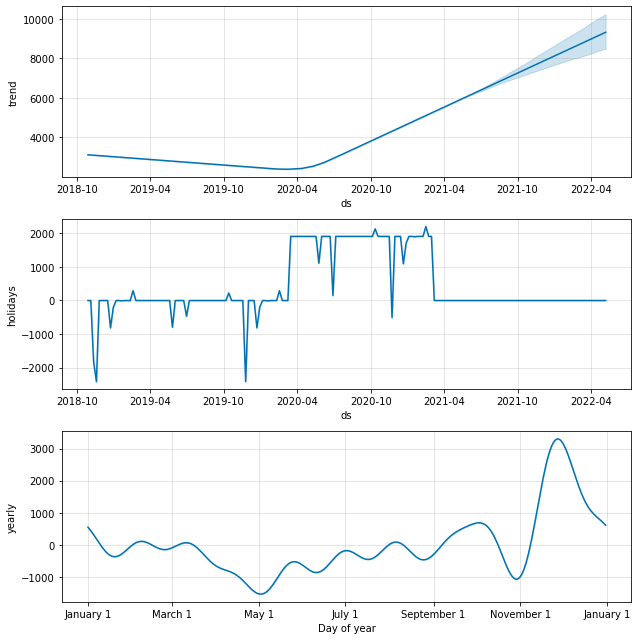

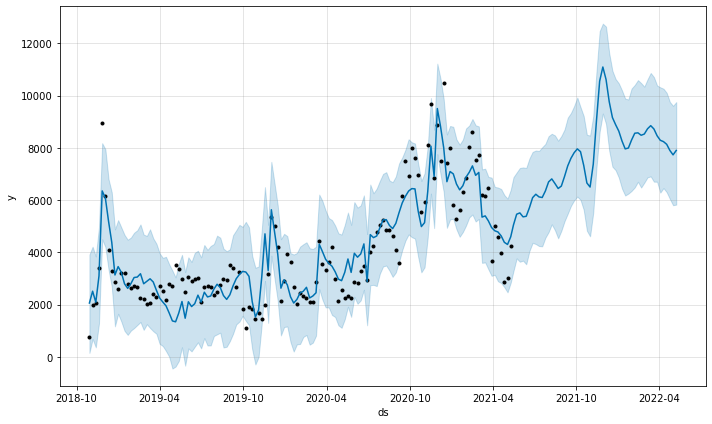

In [ ]:
def get_prediction(df, frequency, horizon, confidence_interval, growth, trend_flexibility):
    prediction = {}
    df_cv = {}
    df_p ={}
    count = 1
    list_cro = df.cro.unique()
    for cro in list_cro.tolist():
        cro_df = df.loc[df['cro'] == cro]
        if (frequency == 'W' or frequency == 'm'):
            model = Prophet(yearly_seasonality = True, holidays = holidays, interval_width = confidence_interval, growth = growth, changepoint_prior_scale = trend_flexibility)
        elif frequency == '1D':
            model = Prophet(weekly_seasonality = True, yearly_seasonality = True, holidays = holidays, interval_width = confidence_interval, growth = growth, changepoint_prior_scale = trend_flexibility)
        elif frequency == 'H':
            model = Prophet(daily_seasonality = True, weekly_seasonality = True, yearly_seasonality = True, holidays = holidays, interval_width = confidence_interval, growth = growth, changepoint_prior_scale = trend_flexibility)
        else:
            model = Prophet(yearly_seasonality = True, holidays = holidays, interval_width = confidence_interval, growth = growth, changepoint_prior_scale = trend_flexibility)
        # model.add_country_holidays(country_name = country)
        model.fit(cro_df)
        future = model.make_future_dataframe(periods = horizon, freq = frequency, include_history = True)
        future['floor'] = 0
        print(count)
        forecast = model.predict(future)
        prediction[cro] = forecast
#        df_cv[cro] = cross_validation(model, initial = '730 days', period = '90 days', horizon = '180 days')
#        df_p[cro] = performance_metrics(df_cv[cro])
#        print(cro)
#        fig2 = plot_cross_validation_metric(df_cv[cro], metric = 'rmse')
        fig1 = model.plot_components(prediction[cro])
        print(cro)
#        fig2 = model.iplot(prediction[cro])
        fig = model.plot(prediction[cro])
#        fig3 = model.plot_plotly(model[cro], prediction[cro])
        count = count+1
    return prediction

#function to pass data and run the model in loop  (dataframe, frequency, horizon, confidence interval reqd, linear/logistic growth, trend flexibility)   
pred = get_prediction(df, 'W', 52, .95, 'linear', 0.09)

In [ ]:
print(pred)

{'Calls':             ds        trend   yhat_lower    yhat_upper  trend_lower  \
0   2018-10-29  3126.650009   155.476987   3916.475887  3126.650009   
1   2018-11-05  3115.877336   689.897787   4217.946188  3115.877336   
2   2018-11-12  3105.104663   367.108142   3846.103496  3105.104663   
3   2018-11-19  3094.331990  1283.903443   4969.964783  3094.331990   
4   2018-11-26  3083.559317  4501.293200   8178.909574  3083.559317   
..         ...          ...          ...           ...          ...   
180 2022-04-10  9050.769478  6460.402752  10262.610334  8303.564397   
181 2022-04-17  9116.665544  6304.948126  10105.055199  8356.516557   
182 2022-04-24  9182.561610  6044.728467   9755.644571  8402.335700   
183 2022-05-01  9248.457676  5804.856661   9606.043423  8444.681701   
184 2022-05-08  9314.353742  5828.310488   9751.334810  8482.760584   

      trend_upper  COVID-19  COVID-19_lower  COVID-19_upper  Christmas Day  \
0     3126.650009       0.0             0.0             0.0

In [ ]:
#list(pred)
#for row in pred[cro].iterrows():
#    [cro]

#pred[cro].head()
#import csv
#with open('C:/Users/Sunny Patel/Documents/Weekly Calls and Orders Prophet Output.csv','w') as f:
#    fieldnames = ['ds', 'yhat']
#    writer = csv.DictWriter(f, fieldnames = fieldnames)
#   writer.writeheader()
#    writer.writerows(pred[cro].keys())
    #for cro in pred.keys():
    #    writer.writerows(pred)
#f.close()

concat = {}
concat = [cro]
list(concat)

#write output to file:
list(pred[cro])
for cro in pred.keys():
#    pred2 = pred.copy()
#    pred2[cro] = pred[cro].update(concat)
    columns = ['ds', 'yhat','yhat_lower','yhat_upper']
    pred[cro].to_csv('C:/Users/Sunny Patel/Documents/Weekly Calls Prophet output.csv', index = True, mode = 'a', columns = columns)
    
        #f.write('\t'pred[cro])
 #for cro in pred.keys():
#list(pred[cro])
# =============================================================================
#import csv
#with open('C:/Users/Sunny Patel/Documents/Weekly Calls and Orders Prophet Output.csv','w') as f:
#     for cro in pred.keys():
#         concat = pred[cro]
#         f.write()
# =============================================================================

#def get_performance(model):
#    count = 0
#    df_cv = {}
#    df_p = {}
#    for cro in list_cro.tolist():    
#        df_cv[cro] = cross_validation(model, initial = '156 days', period = '26 days', horizon = '7 days')
#        df_p[cro] = performance_metrics(df_cv[cro]) 
#        count = count +1
#        print(count)
#    return df_p
#
#perf = get_performance(model)

